In [24]:
import csv
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (8,6)

In [2]:
# Load face data
from google.colab import drive
drive.mount('/content/drive')

faces = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/faces.csv', delimiter=',')

Mounted at /content/drive


### Get values of $\lambda_1$, $\lambda_2$, $\lambda_5$, $\lambda_{10}$, $\lambda_{50}$ and $\sum_i \lambda_i$
Hint: Documentation for [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

In [3]:
# Form Sigma matrix
n = faces.shape[0]
d = faces.shape[1]
sigma = (1 / n) * np.matmul(faces.T, faces)

In [4]:
# Compute eigenvalues, eigenvectors
l, v = np.linalg.eigh(sigma)

In [72]:
# Sort the eigenvalues in decreasing order of magnitude
l_abs = np.abs(l)
idx = l_abs.argsort()[::-1]
l_sort_desc = l_abs[idx]
v_sort_desc = v[:, idx]

# Calculate the trace, which equals the sum of all $d$ eigenvalues
tr = np.trace(sigma)

# Print the requested items
print('lambda_1 = ', l_sort_desc[0])
print('lambda_2 = ', l_sort_desc[1])
print('lambda_10 = ', l_sort_desc[9])
print('lambda_30 = ', l_sort_desc[29])
print('lambda_50 = ', l_sort_desc[49])

print('sum of all eigenvalues = ', tr)

lambda_1 =  781.8126992600014
lambda_2 =  161.15157496732684
lambda_10 =  3.3395867548878293
lambda_30 =  0.8090877903777188
lambda_50 =  0.3895777395181451
sum of all eigenvalues =  1084.2074349947673


## Plot Reconstruction Error vs k
Hint: refer to the documentation for [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

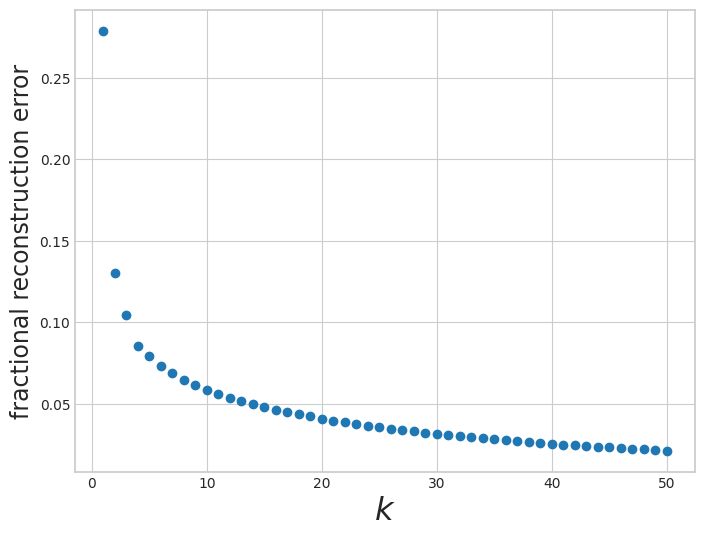

In [45]:
# Your code here
m = 50

frac_err = np.ones(m)
for k in np.arange(m):
  frac_err[k] -= np.sum(l_sort_desc[:(k + 1)]) / tr

plt.scatter(np.linspace(1, 50, 50), frac_err)
plt.xlabel("$k$", fontsize = 23)
plt.ylabel("fractional reconstruction error", fontsize = 17)
# plt.title("Fractional Reconstruction Error \n for the first $k = 1, ..., 50$ \n Eigenvalues", fontsize = 23)
plt.show()

<ipython-input-77-7d39e60d308b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fig = plt.subplot()
<ipython-input-77-7d39e60d308b>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i+1)


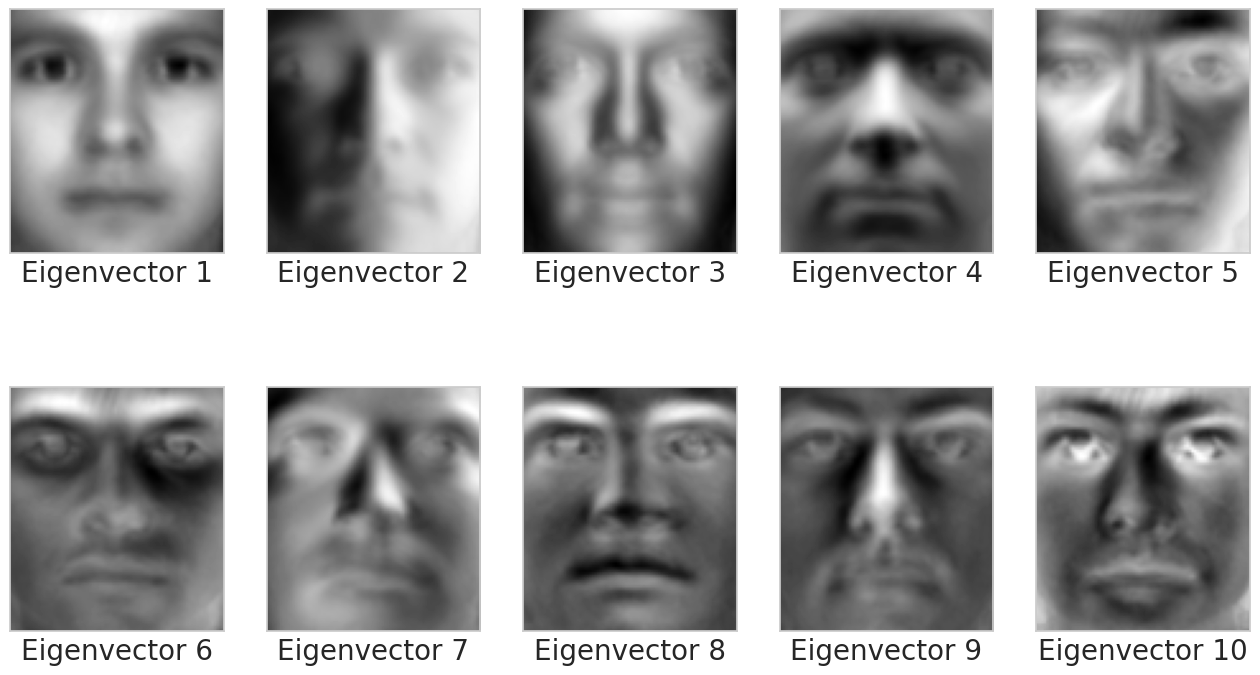

In [77]:
# Plot eigenvectors
fig, axs = plt.subplots(2,5, figsize=(16,9))

fig = plt.subplot()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xlabel('Eigenvector '+str(i+1), fontsize = 20)
    # Your code here
    plt.imshow(v_sort_desc[:, i].reshape((84, 96)).transpose(), cmap = 'gray')

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

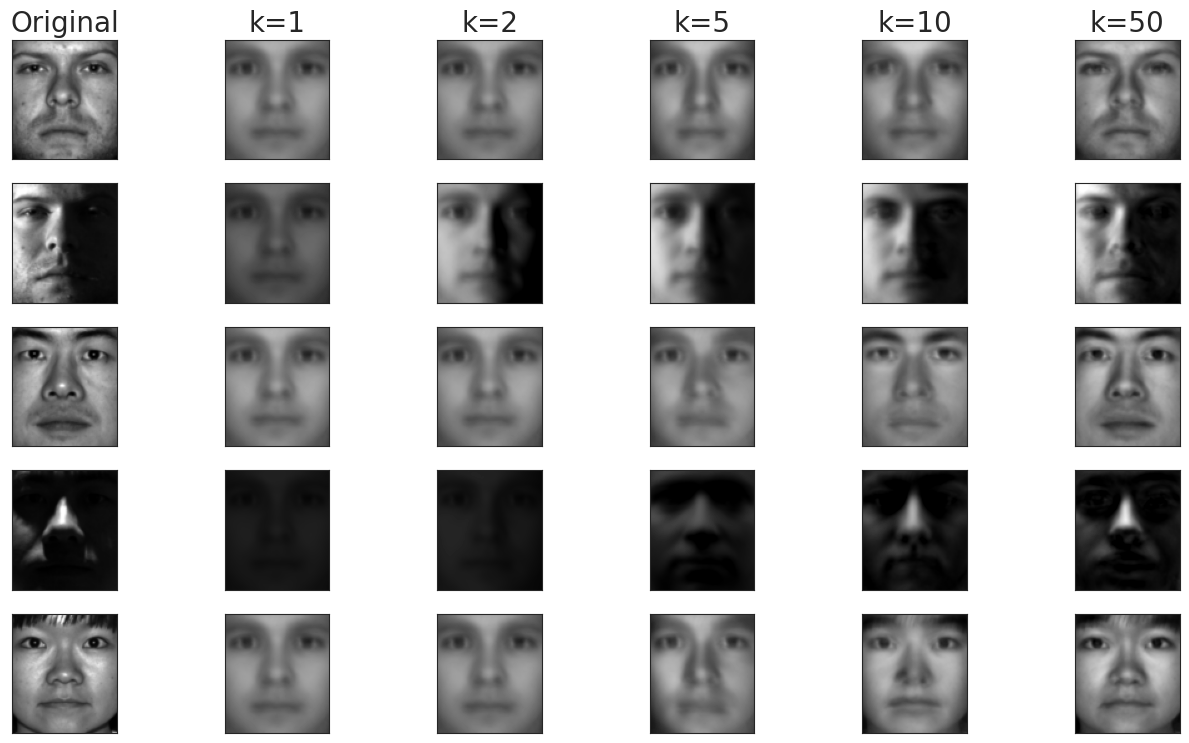

In [112]:
#d1
# plt.style.use('default')
# sns.set_style('white')

fig, axs = plt.subplots(5,6, figsize=(16,9))
axs[0, 0].set_title('Original', fontsize = 20)
axs[0, 1].set_title('k=1', fontsize = 20)
axs[0, 2].set_title('k=2', fontsize = 20)
axs[0, 3].set_title('k=5', fontsize = 20)
axs[0, 4].set_title('k=10', fontsize = 20)
axs[0, 5].set_title('k=50', fontsize = 20)

num_plots_made = 1
for image in [0,23,64,67,256]:
    plt.subplot(5, 6, num_plots_made)
    plt.imshow(faces[image].reshape((84, 96)).transpose(), cmap='gray')
    num_plots_made+=1
    for k in [1,2,5,10,50]:
        # Your code here
        im = np.matmul(faces[image], np.matmul(v_sort_desc[:, :k], v_sort_desc[:, :k].T))
        axs[int((num_plots_made - 1) / 6), (num_plots_made - 1) % 6].imshow(im.reshape((84, 96)).transpose(), cmap = 'gray', vmin = 0, vmax = 1)
        num_plots_made+=1

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()